# Real Estate Price Analysis Project #

## My goal for this project is to hopefully get an answer to the question if real estate prices are overvalued ## 

#### To do this I found data that I thought was the most relevant for the price of real estate and made comparisons between countries ####

1. Price to Income (Average price of real estate in comparison to the avg annual disposable income)
2. Countries DEBT (% of GDP)
3. Population (based on % change), Unemployment rate, Labour force %
4. 10 Year Bond Yield (Most easily accesible data that was the most comparilbe to mortgage rates)
5. Household Debt % (Average household Debt as a percent of household annual disposable income) 
6. Household saving (Average household saving as a percent of household annual disposable income)
7. GDP per Capita
8. Household Spending (% of disposable income spent on basic needs(food,rent,hydro etc))



In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from datetime import datetime


Price_to_Income0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\House Price to Income Ratio.csv")
levels_of_debt10 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\imf-levels of debt Major Countries (1).csv")
Major_Country_data10 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\Major Countries Data - Population , Unemployment, Labour force, borrowers.csv")  
InterestRates_MajorCountries0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\Long_Term_InterestRates.csv")
Household_debt0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\Household_debt_%_of_disposableIncome.csv")
Household_saving0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\HouseholdSaving_%_of_disposableIncome.csv")
GDP_per_Capita0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\GDP_per_Capita.csv")
Housespending0 = pd.read_csv(r"C:\Users\philb\Desktop\Python\Datasets\Household spending on House %of disposable income.csv")




## Data Cleaning ##

#### Because a lot of the data was downloaded from different sources I want to convert all the data into the same format so that eventually I can add all the relevant real estate data into one big dataset for each country and begin making proper analysis from there ####

In [2]:
Price_to_Income0 = Price_to_Income0.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
Price_to_Income0 = Price_to_Income0.rename(columns={"Value": "Price_to_Income", "TIME": "Date", "LOCATION": "Country"})
Price_to_Income0["Country"] = Price_to_Income0["Country"].replace({"JPN":"Japan","AUS":"Australia","CAN":"Canada","USA":"United States","FRA":"France","RUS":"Russia"
                                    ,"GBR":"United Kingdom", "MEX":"Mexico","DEU":"Germany","CHN":"China"})

Price_to_Income0["Date"] = Price_to_Income0["Date"].astype(int)

#### The Price to Income data will be used as an example as the format I will be looking to convert all the data sets too before merging them together. ####

*This format will include these column values:*
1. Country
2. Date
3. **variable**

In [3]:
Price_to_Income0.head(2)

,Country,Date,Price_to_Income
0,Australia,1970,57.445893
1,Australia,1971,58.938532


**The countries that I choose to do the analysis on are:**

* Canada
* Germany
* Japan
* United States
* Australia
* United Kingdom

*These were the countries with the most accesible data, but also proper coverage of the main georgaphical regions of the world*

In [4]:
# Making seperate dataframes for each unique countries Price-to-Income data

CAN_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "Canada", ["Country", "Date", "Price_to_Income"]]
GER_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "Germany", ["Country", "Date", "Price_to_Income"]]
JPN_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "Japan", ["Country", "Date", "Price_to_Income"]]
USA_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "United States", ["Country", "Date", "Price_to_Income"]]
AUS_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "Australia", ["Country", "Date", "Price_to_Income"]]
GBR_data_PTI0 = Price_to_Income0.loc[Price_to_Income0["Country"] == "United Kingdom", ["Country", "Date", "Price_to_Income"]]

In [5]:
# Data cleaning to fit format explained above - Household spending

Housespending0 = Housespending0.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
Housespending0 = Housespending0.rename(columns={"Value": "Household Spending", "TIME": "Date", "LOCATION": "Country"})
Housespending0["Country"] = Housespending0["Country"].replace({"JPN":"Japan","AUS":"Australia","CAN":"Canada","USA":"United States","FRA":"France","RUS":"Russia"
                                    ,"GBR":"United Kingdom", "MEX":"Mexico","DEU":"Germany","CHN":"China"})

Housespending0["Date"] = Housespending0["Date"].astype(int)

In [6]:
Housespending0.head(1)

,Country,Date,Household Spending
0,FIN,1995,18.081304


#### The "levels_of_debt" dataset has a unique format with the Date being a row for each year requiring addational cleaning ####

In [7]:
levels_of_debt10.head(1)

,DEBT (% of GDP),1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data cleaning to fit format explained above - DEBT (% of GDP)

#Changing the Dates from columns to row's
levels_of_debt_NOTCLEAN = pd.melt(levels_of_debt10, id_vars="DEBT (% of GDP)", var_name = "Date",value_name="Value")


levels_of_debt_NOTCLEAN = levels_of_debt_NOTCLEAN.rename(columns={"DEBT (% of GDP)": "Country", "Value": "DEBT (% of GDP)"})

#Removing redundant information
delete1 = levels_of_debt_NOTCLEAN["Country"] == "©IMF, 2019"
delete2 = levels_of_debt_NOTCLEAN["DEBT (% of GDP)"] == "no data"
levels_of_debt_NOTCLEAN.loc[delete1, "Date"] = np.nan
levels_of_debt_NOTCLEAN.loc[delete2, "DEBT (% of GDP)"] = np.nan

levels_of_debt0 = levels_of_debt_NOTCLEAN.dropna()
levels_of_debt0["Date"] = levels_of_debt0["Date"].astype(int)


#The data goes back to the 1800's so I will need to condense it to avoid dataset merging problems in the future
levels_of_debt0 = levels_of_debt0[levels_of_debt0["Date"] > 1970]

C:\Users\philb\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [9]:
levels_of_debt0.head(1)

,Country,Date,DEBT (% of GDP)
2395,Australia,1971,31.33


In [10]:
# Data cleaning to fit format explained above - Household saving

Household_saving0 = Household_saving0.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
Household_saving0 = Household_saving0.rename(columns={"Value": "Household Saving", "TIME": "Date", "LOCATION": "Country"})
Household_saving0["Country"] = Household_saving0["Country"].replace({"JPN":"Japan","AUS":"Australia","CAN":"Canada","USA":"United States","FRA":"France","RUS":"Russia"
                                    ,"GBR":"United Kingdom", "MEX":"Mexico","DEU":"Germany","CHN":"China"})

Household_saving0["Date"] = Household_saving0["Date"].astype(int)

In [11]:
Household_saving0.head(1)

,Country,Date,Household Saving
0,Australia,1970,14.730999


In [12]:
# Data cleaning to fit format explained above - GDP per Capita

GDP_per_Capita0 = GDP_per_Capita0.drop("Code", axis=1)
GDP_per_Capita0 = GDP_per_Capita0.rename(columns={"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) ($)": "GDP_per_Capita", "Year": "Date", "Entity":"Country"})


GDP_per_Capita0["Date"] = GDP_per_Capita0["Date"].astype(int)

GDP_per_Capita0 = GDP_per_Capita0[GDP_per_Capita0["Date"] > 1970]

In [13]:
GDP_per_Capita0.head(1)

,Country,Date,GDP_per_Capita
21,Afghanistan,1971,2560


In [14]:
# Data cleaning to fit format explained above - Interest Rates

InterestRates_MajorCountries0 = InterestRates_MajorCountries0.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
InterestRates_MajorCountries0 = InterestRates_MajorCountries0.rename(columns={"Value": "Interest RATE", "TIME": "Date", "LOCATION": "Country"})
InterestRates_MajorCountries0["Country"] = InterestRates_MajorCountries0["Country"].replace({"JPN":"Japan","AUS":"Australia","CAN":"Canada","USA":"United States","FRA":"France","RUS":"Russia"
                                    ,"GBR":"United Kingdom", "MEX":"Mexico","DEU":"Germany","CHN":"China"})

InterestRates_MajorCountries0["Date"] = InterestRates_MajorCountries0["Date"].astype(int)

In [15]:
InterestRates_MajorCountries0.head(1)

,Country,Date,Interest RATE
0,PRT,1994,10.47833


In [16]:
# Data cleaning to fit format explained above - Household debt

Household_debt0 = Household_debt0.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)
Household_debt0 = Household_debt0.rename(columns={"Value": "Household Debt", "TIME": "Date", "LOCATION": "Country"})
Household_debt0["Country"] = Household_debt0["Country"].replace({"JPN":"Japan","AUS":"Australia","CAN":"Canada","USA":"United States","FRA":"France","RUS":"Russia"
                                    ,"GBR":"United Kingdom", "MEX":"Mexico","DEU":"Germany","CHN":"China"})

Household_debt0["Date"] = Household_debt0["Date"].astype(int)

In [17]:
Household_debt0.head(1)

,Country,Date,Household Debt
0,Australia,1995,95.68999


In [18]:
# Data cleaning to fit format explained above - Unemployment %
# Just like for "DEBT (% of GDP)" Dataset, this dataset is unique having the Date being a row for each year


# Because of an unknown error that kept coming up removing this column was the most convienant fix
Major_Country_data10 = Major_Country_data10.drop(columns="1990 [YR1990]")

Major_Country_data10 = Major_Country_data10.drop(["Country Code", "Series Code"], axis=1)
Major_Country_data10 = Major_Country_data10.rename(columns={"Country Name": "Country"})

#Changing the Dates from columns to row's
Major_Country_data_NOTCLEAN1 = pd.melt(Major_Country_data10, id_vars=["Country","Series Name"], var_name = "Date",value_name="Value")


# Initially this dataset included three additional variables: ("Pop growth", "Labor force participation", Borrower from commercial banks)
# Because I didn't find a meaningful way to make use of this data so I removed it from the final datasets
delete11 = Major_Country_data_NOTCLEAN1["Series Name"] == "Borrowers from commercial banks (per 1,000 adults)"
delete2 = Major_Country_data_NOTCLEAN1["Series Name"] == "Population growth (annual %)"
delete3 = Major_Country_data_NOTCLEAN1["Series Name"] == "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
Major_Country_data_NOTCLEAN1.loc[delete11, "Series Name"] = np.nan
Major_Country_data_NOTCLEAN1.loc[delete2, "Series Name"] = np.nan
Major_Country_data_NOTCLEAN1.loc[delete3, "Series Name"] = np.nan


Major_Country_data_NOTCLEAN1 = Major_Country_data_NOTCLEAN1.dropna()
Major_Country_data10 = Major_Country_data_NOTCLEAN1.replace(["2007 [YR2007]","2008 [YR2008]", "2009 [YR2009]","2010 [YR2010]","2011 [YR2011]","2012 [YR2012]", "2013 [YR2013]","2014 [YR2014]","2015 [YR2015]","2016 [YR2016]","2006 [YR2006]","2005 [YR2005]","2004 [YR2004]","2003 [YR2003]","2002 [YR2002]","2001 [YR2001]","2000 [YR2000]","1999 [YR1999]","1998 [YR1998]","1997 [YR1997]","1996 [YR1996]","1995 [YR1995]","1994 [YR1994]","1993 [YR1993]","1992 [YR1992]","1991 [YR1991]","1990 [YR1990]"],
                                                                 ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2006","2005","2004","2003","2002","2001","2000","1999","1998","1997","1996","1995","1994","1993","1992","1991","1990"])

Major_Country_data10["Date"] = Major_Country_data10["Date"].astype(int)
Major_Country_data10 = Major_Country_data10.sort_values('Date')

Major_Country_data10 = Major_Country_data10.drop(columns=["Series Name"])
Unemployment_data = Major_Country_data10.rename(columns={"Value": "Unemployment %"})

In [19]:
Unemployment_data.head(1)

,Country,Date,Unemployment %
1266,Russian Federation,1991,5.68599987030029


## Data Merging ##

### Because all the datasets are now in the same format, I am able to easily merge each of them together so that I can create a dataset for each country. ###

#### In order to create a dataset seperate to each country I will first have to specify my code to go through each dataset, extract each country im working with, assign the country to it's own variable for all the datasets and after that merge all of the countries variables together into one. ####

##### This would require a lot of repetition and a lot of code so I figured out a way to automate this process below #####

In [20]:
# Column names for the merged datasets
col_names = ["Household Spending","Household Saving","DEBT (% of GDP)","Household Debt","Interest RATE","GDP_per_Capita","Unemployment %"]
    
# Cleaned datasets
Unique_datasets = [Housespending0, Household_saving0, levels_of_debt0, Household_debt0, InterestRates_MajorCountries0, GDP_per_Capita0, Unemployment_data]
 
# Countries choosen for the analysis
Country_list = ["Canada", "United Kingdom", "Australia", 
                "Germany", "Japan", "United States"]

# Original dataset that will be used as the anchor for the merging
Dataframe_starter = [CAN_data_PTI0,  GBR_data_PTI0, AUS_data_PTI0, GER_data_PTI0, 
                     JPN_data_PTI0, USA_data_PTI0]


     
    
for data, col_string in zip(Unique_datasets, col_names):
        
    for (idx, item), country in zip(enumerate(Dataframe_starter), Country_list):
            
        a = data.loc[data["Country"] == country, ["Country", "Date", col_string]]
        
        
        if (idx+1) == 1:
            CAN_data_PTI0 = CAN_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])
        
        if (idx+1) == 2:
            GBR_data_PTI0 = GBR_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])
        
        if (idx+1) == 3:
            AUS_data_PTI0 = AUS_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])
        
        if (idx+1) == 4:
            GER_data_PTI0 = GER_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])
        
        if (idx+1) == 5:
            JPN_data_PTI0 = JPN_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])
        
        if (idx+1) == 6:
            USA_data_PTI0 = USA_data_PTI0.merge(a, how='outer', on=['Country', 'Date'])        
            

### Extra Notes ###

* The merging created many duplicate row's, so the most conveniant fix I found was to just remove them
* I decided to change all the datasets to a timeseries in case it might be easier to do any additional analysis with in the future
* Some variables include more recent data while others do not, this is was what I have to work with from the sources I found online

In [21]:
CAD_data= CAN_data_PTI0.drop([49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64])

CAD_data.index = pd.date_range('1970-01-01', periods=49, freq='Y')

CAD_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2016-12-31,Canada,2016,110.913527,19.464110,1.284870,NaN,181.8281,1.251758,43745.0,7
2017-12-31,Canada,2017,120.016775,19.210735,1.771594,NaN,181.4430,1.783652,NaN,NaN
2018-12-31,Canada,2018,122.241410,NaN,1.685494,NaN,180.9015,2.277912,NaN,NaN


In [22]:
USA_data= USA_data_PTI0.drop([49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65])

USA_data.index = pd.date_range('1970-01-01', periods=49, freq='Y')

USA_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2016-12-31,United States,2016,103.737135,15.936766,6.913566,NaN,109.1924,1.841667,53015.0,4.86999988555908
2017-12-31,United States,2017,106.186282,15.912111,6.897013,NaN,108.6204,2.330000,NaN,NaN
2018-12-31,United States,2018,107.327492,NaN,NaN,NaN,NaN,2.910000,NaN,NaN


In [23]:
GER_data= GER_data_PTI0.drop([39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61])

GER_data.index = pd.date_range('1980-01-01', periods=40, freq='Y')

GER_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2017-12-31,Germany,2017,108.504162,17.124950,10.422464,NaN,95.14969,0.317500,NaN,NaN
2018-12-31,Germany,2018,112.092434,16.845922,10.953385,NaN,95.31177,0.396667,NaN,NaN
2019-12-31,Germany,2019,NaN,NaN,NaN,NaN,NaN,-0.252500,NaN,NaN


In [24]:
JPN_data = JPN_data_PTI0

JPN_data.index = pd.date_range('1960-01-01', periods=60, freq='Y')

JPN_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2017-12-31,Japan,2017,102.575595,19.722233,2.749556,NaN,107.2666,0.051667,NaN,NaN
2018-12-31,Japan,2018,101.564885,NaN,NaN,NaN,NaN,0.065000,NaN,NaN
2019-12-31,Japan,2019,NaN,NaN,NaN,NaN,NaN,-0.110417,NaN,NaN


In [25]:
AUS_data = AUS_data_PTI0

AUS_data.index = pd.date_range('1970-01-01', periods=50, freq='Y')

AUS_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2017-12-31,Australia,2017,112.776963,18.431312,3.508624,NaN,215.9566,2.639167,NaN,NaN
2018-12-31,Australia,2018,109.504746,NaN,NaN,NaN,NaN,2.684167,NaN,NaN
2019-12-31,Australia,2019,NaN,NaN,NaN,NaN,NaN,1.493333,NaN,NaN


In [26]:
UK_data= GBR_data_PTI0.drop([32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59])

UK_data.index = pd.date_range('1987-01-01', periods=32, freq='Y')

UK_data.tail(3)

,Country,Date,Price_to_Income,Household Spending,Household Saving,DEBT (% of GDP),Household Debt,Interest RATE,GDP_per_Capita,Unemployment %
2016-12-31,United Kingdom,2016,106.056509,21.766930,1.738755,NaN,145.0968,1.305208,37334.0,4.80999994277954
2017-12-31,United Kingdom,2017,108.663180,21.901080,-0.332987,NaN,146.7209,1.235808,NaN,NaN
2018-12-31,United Kingdom,2018,107.457582,21.688413,0.366175,NaN,145.8251,1.460658,NaN,NaN


## Data Analysis ##

#### The first thing I will do is compare each countries Price-to-Income of real estate to see if there is anything interesting to take out of it ####

*Note: The shaded regions are years during global recessions*


C:\Users\philb\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


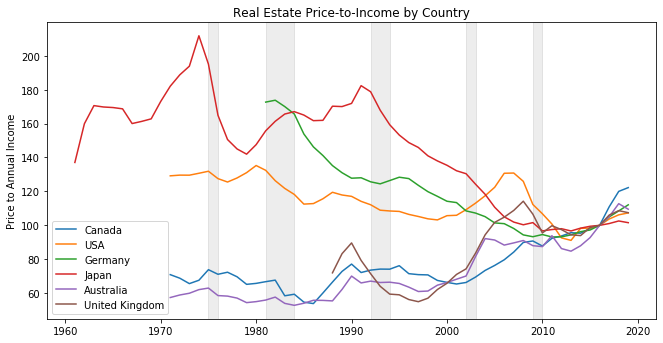

In [27]:
import datetime as dt

fig = plt.figure(figsize=(24, 12))

ax = fig.add_subplot(2,2,1)

Country_data = [CAD_data,USA_data,GER_data,JPN_data,AUS_data,UK_data]
labels = ['Canada', 'USA', 'Germany', 'Japan', 'Australia', 'United Kingdom']

for country, Clabel in zip(Country_data, labels):

    ax.plot(country["Price_to_Income"], label=Clabel)
    ax.set_title("Real Estate Price-to-Income by Country")
    ax.set_ylabel("Price to Annual Income")
    
    ax.axvspan(datetime(1974,12,31), datetime(1975,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(1980,12,31), datetime(1983,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(1991,12,31), datetime(1993,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(2001,12,31), datetime(2002,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(2008,12,31), datetime(2009,12,31), alpha=0.025, color='grey')

    ax.legend()


### After taking a good look at this graph you can assimilate that the time since the last global recession has been over 11 years. Which is the longest expansionary period out of this small sample size of global recessions. It is worth noting that although the sample size for global recessions is small, if looking at US data for global recessions this period is still the longest without a recession in history. ###

*Although based on the graph during recessions prices don't necessarily drop on the metric of "Price-to-Income", they may drop on the basis of the local currency since wages may decrease aswell during recesions.*

#### Some other interesting notes to point out is how over the last 50 years many of these countries went from complete opposite ranges to a common price zone (between 100-120). My assumption is this may be because of how much more connected the world is becoming, globalization and also the shift from countries being more developing to developed. *This may also tell us that prices may be more likely to trend together moving forward* ####

#### My next question is what is the main driver for price-to-income flucations based on the data I have available? My guess is interest rates, so I will analyse interest rates and compare the two data points to see if there is some kind of coerelation. ####

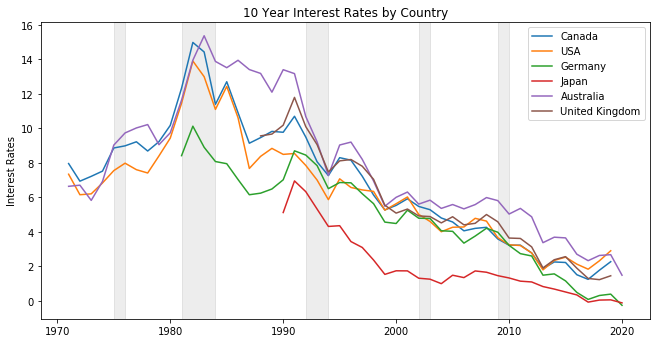

In [28]:
fig = plt.figure(figsize=(24, 12))

ax = fig.add_subplot(2,2,1)

Country_data = [CAD_data,USA_data,GER_data,JPN_data,AUS_data,UK_data]
labels = ['Canada', 'USA', 'Germany', 'Japan', 'Australia', 'United Kingdom']

for country, Clabel in zip(Country_data, labels):

    ax.plot(country["Interest RATE"], label=Clabel)
    ax.set_title("10 Year Interest Rates by Country")
    ax.set_ylabel("Interest Rates")
    
    ax.axvspan(datetime(1974,12,31), datetime(1975,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(1980,12,31), datetime(1983,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(1991,12,31), datetime(1993,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(2001,12,31), datetime(2002,12,31), alpha=0.025, color='grey')
    ax.axvspan(datetime(2008,12,31), datetime(2009,12,31), alpha=0.025, color='grey')

    ax.legend()

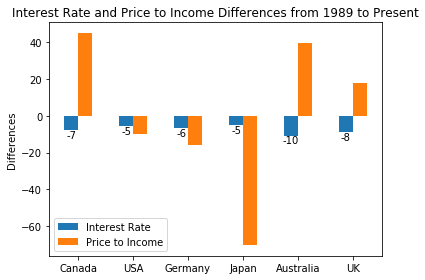

In [29]:
# Using a bar graph to compare the impact of real estate prices and interest rates


Interest_Rates_diff = []
Price_to_Income_diff = []
Household_debt_diff = []

Countrys = [CAD_data, USA_data, GER_data, JPN_data, AUS_data, UK_data]

for country in Countrys:
    Interest_Rates_diff.append(country.loc['2018-12-31']["Interest RATE"] - country.loc['1989-12-31']["Interest RATE"])
    Price_to_Income_diff.append(country.loc['2018-12-31']["Price_to_Income"] - country.loc['1989-12-31']["Price_to_Income"])
    Household_debt_diff.append((country.loc['2016-12-31']["Household Debt"] - country.loc['1995-12-31']["Household Debt"]))

labels = ['Canada', 'USA', 'Germany', 'Japan', 'Australia', 'UK']
x = np.arange(len(labels)) 
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Interest_Rates_diff, width, label='Interest Rate')
rects2 = ax.bar(x + width/2, Price_to_Income_diff, width, label='Price to Income')



ax.set_ylabel('Differences')
ax.set_title('Interest Rate and Price to Income Differences from 1989 to Present')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def alabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')


alabel(rects1)


fig.tight_layout()

plt.show()

#### We can see from the bar graph above that there is a slight corelation between interest rates. The three countries that had a drop in price to income since 1989 also had the smallest drop in interest rates percentage, while the three other countries that rose in price to income had a much greater drop in interest rate percentage. ####

*If we check back to our datasets we can see that interest rates in all of our countries are very close to 0 if not at 0. This may be an argument against long term continued home price increases.*

#### This leaves me with the question with interest rates dropping and home prices mostly rising, how is household debt holding up? I'll try to get an answer to this by creating a line comparing price to income, interest rates and household debt. ####

In [30]:

# Creating a function that displays a line graph with three axes

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

def three_var_line_graph(data, var1, var2, var3):


    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(wspace=12, hspace=8)
    
    par1 = host.twinx()
    par2 = host.twinx()
    
    offset = 60
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))
    
    par1.axis["right"].toggle(all=True)
    par2.axis["right"].toggle(all=True)
    
    host.set_xlabel("Date")
    host.set_ylabel(var1)
    par1.set_ylabel(var2)
    par2.set_ylabel(var3)
    
    p1, = host.plot(data["Date"], data[var1])
    p2, = par1.plot(data["Date"], data[var2])
    p3, = par2.plot(data["Date"], data[var3])
    
    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())
    
    host.axvspan(1974, 1975, alpha=0.2, color='grey')
    host.axvspan(1980, 1983, alpha=0.2, color='grey')
    host.axvspan(1991, 1993, alpha=0.2, color='grey')
    host.axvspan(2001, 2002, alpha=0.2, color='grey')
    host.axvspan(2008, 2009, alpha=0.2, color='grey')
    
    
    
    plt.draw()
    plt.show()

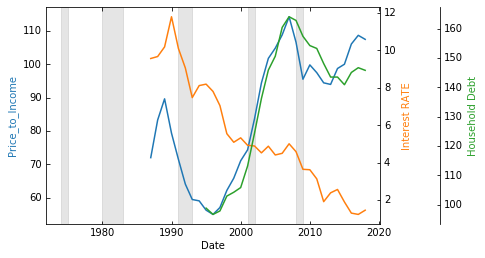

In [31]:
# United Kingdom
three_var_line_graph(data=UK_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

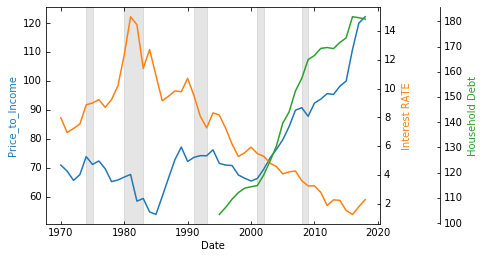

In [32]:
# Canada
three_var_line_graph(data=CAD_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

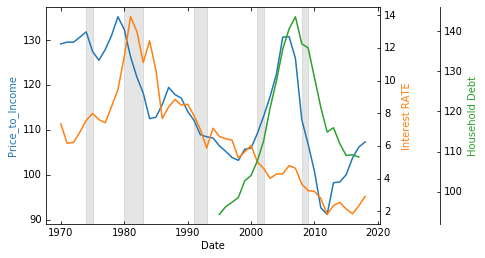

In [33]:
# United States
three_var_line_graph(data=USA_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

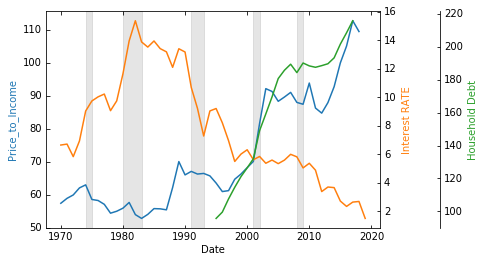

In [34]:
# Australia
three_var_line_graph(data=AUS_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

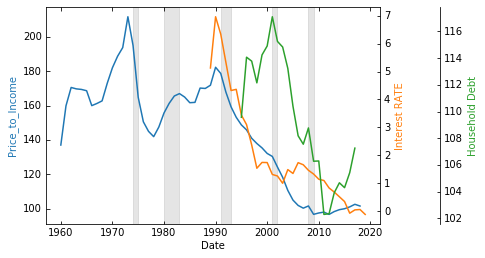

In [35]:
# Japan
three_var_line_graph(data=JPN_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

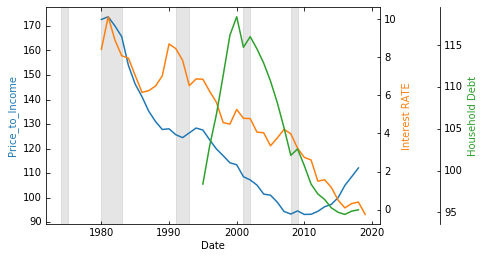

In [36]:
# Germany
three_var_line_graph(data=GER_data, var1="Price_to_Income", var2="Interest RATE", var3="Household Debt")

#### Based on the graphs above it's pretty clear that there is some sort of corelation between Household debt and and price to income. It might be better to use a different metric like a scatter plot to see exactly how much of a corelation there is. ####

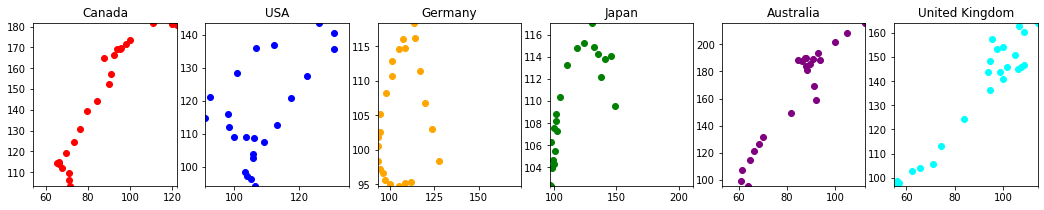

In [37]:
Country_data = [CAD_data, USA_data, GER_data, JPN_data, AUS_data, UK_data]
labels = ['Canada', 'USA', 'Germany', 'Japan', 'Australia', 'United Kingdom']
colors = ["red","blue","orange","green","purple","cyan"]



fig = plt.figure(figsize=(18, 3))

for Country,i in zip(Country_data,range(6)):
    ax = fig.add_subplot(1,6,i+1)
    ax.scatter(Country["Price_to_Income"], Country["Household Debt"], c=colors[i], label='Real Estate Prices To AvgIncome', linewidth=1)
    ax.set_title(labels[i])

    
    
    ax.set_xlim(Country["Price_to_Income"].min(), Country["Price_to_Income"].max())
    ax.set_ylim(Country["Household Debt"].min(), Country["Household Debt"].max())
    
    ax.set_xticks(ticks=[Country["Price_to_Income"].min(),Country["Price_to_Income"].max()], minor=True)


    plt.yticks(size = 10)

#### It seems like there is definitely a corelation as seen from the dots going from the bottom left corner to top right. The only two exceptions seem to be Germany and Japan. ####

#### My next question to ask is whether the amounts of debt households are burdened with affecting the amount of money they have or is most of it going towards debt payments ? I'll try to answer this question next by comparing Household Debt, Household Saving and household spending ####

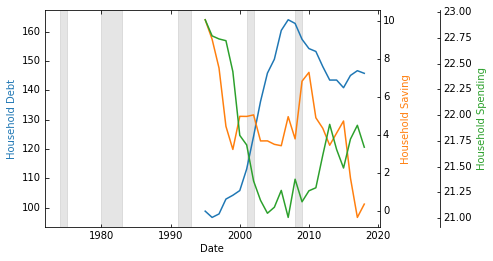

In [38]:
# United Kingdom
three_var_line_graph(data=UK_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

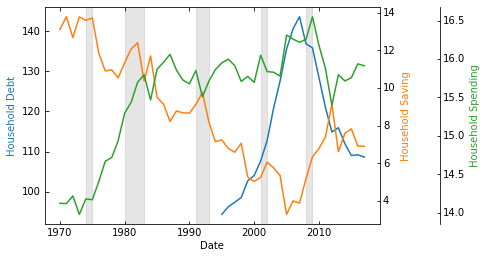

In [39]:
# United States
three_var_line_graph(data=USA_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

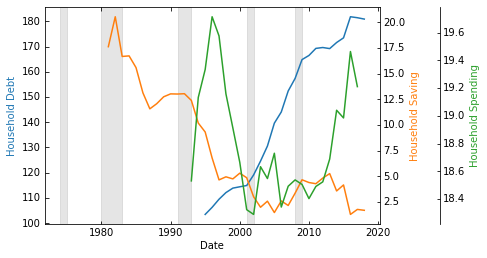

In [40]:
# Canada
three_var_line_graph(data=CAD_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

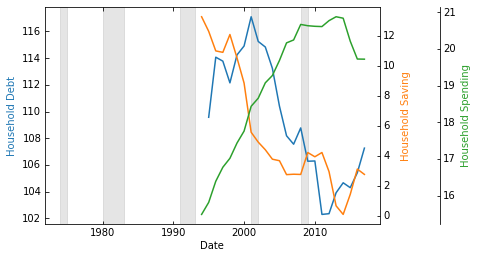

In [41]:
# Japan
three_var_line_graph(data=JPN_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

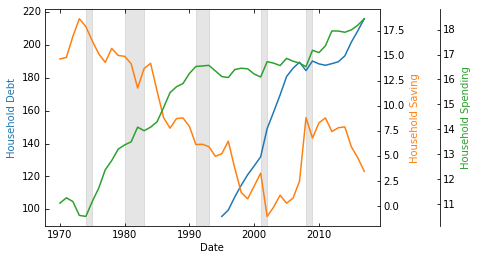

In [42]:
# Australia
three_var_line_graph(data=AUS_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

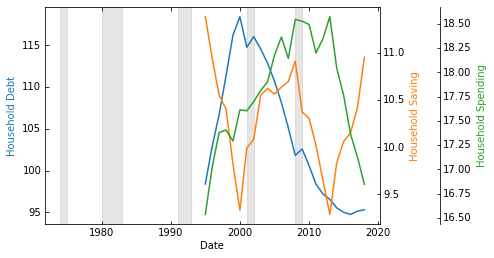

In [43]:
# Germany
three_var_line_graph(data=GER_data, var1="Household Debt", var2="Household Saving", var3="Household Spending")

#### After analysing the data, we can clearly see that many of the countries have had dramatic drops in household savings over the last 30-50 years. We can see this best if we pay attention to the Household Saving scale and see how extended it is for many countries. ####

#### This also comes with or is a result of an increase in household spending, although not as dramatic. My guess is that low interest rates is keeping household spending relatively low despite the high amounts of debt for many countries. But because of the high amounts of debt it may be impacting the amounts people are saving because they are more inclined to pay of the principle off their debts. #####

*It is said that savings are good for an economies long term growth as more goods are produced and sold*

##### I'd say this is overall a bad thing for the price of homes in the long run #####

##### Next i'll try to analyse how well countries overall economy is doing with three main variables: #####

1. GDP_per_Capita
2. DEBT (% of GDP)
3. Unemployment %

In [44]:
# Because of an unknown error I decided to drop these specific data points
GER_data["DEBT (% of GDP)"].loc[:'1992-12-31'] = np.nan
UK_data["DEBT (% of GDP)"].loc[:'1992-12-31'] = np.nan

C:\Users\philb\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


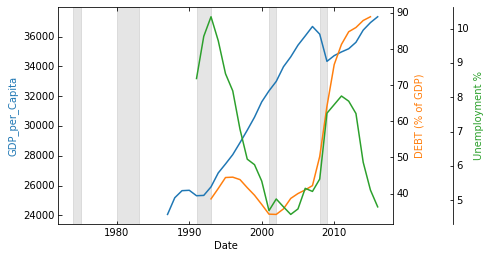

In [45]:
# United Kingdom
three_var_line_graph(data=UK_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

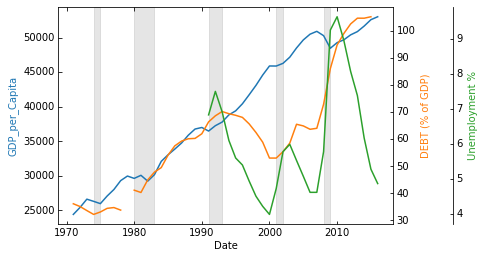

In [46]:
# United States
three_var_line_graph(data=USA_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

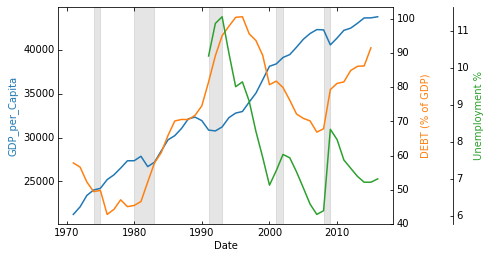

In [47]:
# Canada
three_var_line_graph(data=CAD_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

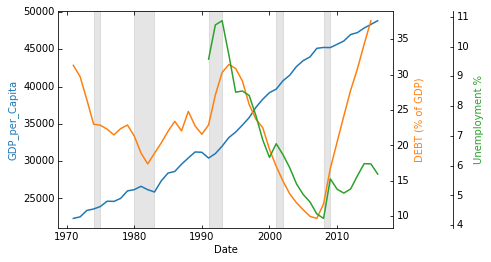

In [48]:
# Australia
three_var_line_graph(data=AUS_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

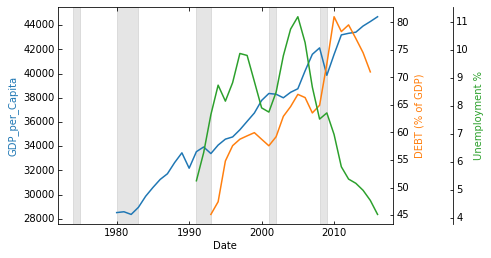

In [49]:
# Germany
three_var_line_graph(data=GER_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

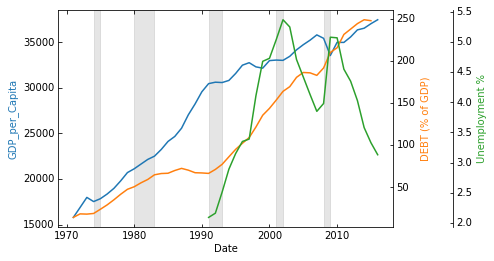

In [50]:
# Japan
three_var_line_graph(data=JPN_data, var1="GDP_per_Capita",var2="DEBT (% of GDP)",var3="Unemployment %")

#### Based on the graphs above you can decipher that most countries Debt (% of GDP) has been on the rise for the last 40-50 years with many countries above the 70-80 mark. 

#### This is a quote from investopedia talking about Debt (% of GDP): "A study by the World Bank found that countries whose debt-to-GDP ratios exceeds 77% for prolonged periods, experience significant slowdowns in economic growth." 5 of the 6 countries I'm analysing are near or above this range which can be bad news for home prices in the long term. On top of this if you look closely, during every recession almost every country experiences a sharp increase in Debt levels which can be worse news considering as we pointed out above currently we are in the longest economic expansion without a recession in history, if a recession hits Debt levels can still move even higher.#####

#### Another thing to point out is the unemplyment levels which are all near low levels. This is good for an economy as long as the levels are kept at this range, but historically low unemployment levels can be a recession indicator as they may point out that a country is coming to the latter part of it's economic expansion cycle. You can see this even from the data we have as before most recessions unemployment levels are very low. ####



## Conclusion ##

### Overall, with all things considered my guess is that home prices are likely to see a correction or at the very least slow down during this current decade based on the data points analysed above. ### 

1. For starters, during recessions home prices tend to decrease, atleast relative to the local currency. Considering we are currently in the longest expansion cycle without a recession, you can deem it likely that within this decade we will have a recession


2. Interest rates over the last 40-50 years have consistently been dropping for all countries across the board and many countries are near or around the 0% range which means little room for continued decrease. With interest rates having some kind of corelation to the price of real estate this can be bad for the price of real estate for the future.


3. Many countries have low levels of household savings, which negatively affects an economies long term growth which can be an argument against the price of real estate in the future as slow down in economic growth can mean loss of jobs which has an effect on real estate.


4. Many of the countries are all around the all time high level for debt as a % of GDP which as stated above can also be a bad thing for the future growth of an economy. 


5. Low levels of unemployment are good for a country, but indicate that a country can be near the end of it's economic expansion cycle and due for a recession which would align with how long it's been without a recession.

